 ## Data Cleaning

In [6]:
import numpy as np
import pandas as pd
import string

In [7]:
dataframe = pd.read_csv('spam.csv', encoding='ISO-8859-1')
dataframe.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus...",NaN,NaN,NaN
3269,ham,K actually can you guys meet me at the sunoco ...,NaN,NaN,NaN
3946,ham,"Sorry, went to bed early, nightnight",NaN,NaN,NaN
356,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
4932,ham,Once free call me sir.,NaN,NaN,NaN
4533,ham,I have no money 4 steve mate! !,NaN,NaN,NaN
3432,ham,Christmas is An occasion that is Celebrated as...,NaN,NaN,NaN
1665,ham,Dunno cos i was v late n when i reach they ins...,NaN,NaN,NaN
5219,ham,Pls she needs to dat slowly or she will vomit ...,NaN,NaN,NaN
3633,ham,Its a big difference. &lt;#&gt; versus &lt;...,NaN,NaN,NaN


In [8]:
dataframe.shape 
# there are 5572 datasamples

(5572, 5)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# removing the unwanted parameters in dataset & renaming the columns
dataframe.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
dataframe.rename(columns={'v1':'key', 'v2':'msg'}, inplace=True)
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
dataframe.sample(10)

,key,msg
5147,spam,Get your garden ready for summer with a FREE s...
1457,spam,CLAIRE here am havin borin time & am now alone...
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
2749,ham,You said not now. No problem. When you can. Le...
2928,ham,Where wuld I be without my baby? The thought a...
2981,ham,"Tonight? Yeah, I'd be down for that"
4115,ham,What you doing?how are you?
2810,ham,Thinkin about someone is all good. No drugs fo...
1703,ham,Just taste fish curry :-P
3205,ham,At home also.


In [12]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataframe['key'] = label_encoder.fit_transform(dataframe['key'])
dataframe.sample(10)

,key,msg
5303,0,"I can. But it will tell quite long, cos i have..."
2663,1,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
3199,0,Just curious because my cuz asked what I was u...
1729,0,Lol yeah at this point I guess not
1616,0,"K, makes sense, btw carlos is being difficult ..."
2975,0,I love u 2 my little pocy bell I am sorry but ...
4151,0,What's nannys address?
1752,0,Give one miss from that number please
999,0,"Aight will do, thanks again for comin out"
1929,1,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...


In [13]:
# Check for missing values 
dataframe.isnull().sum()

key    0
msg    0
dtype: int64

In [14]:
# Check for duplicate values
dataframe.duplicated().sum()

403

In [15]:
# Removing duplicated values
dataframe = dataframe.drop_duplicates(keep='first')
# Data is cleaned 

## Exploratory Data Analysis

In [16]:
# Knowing the composition of ham and spam in the dataset
dataframe["key"].value_counts()

key
0    4516
1     653
Name: count, dtype: int64

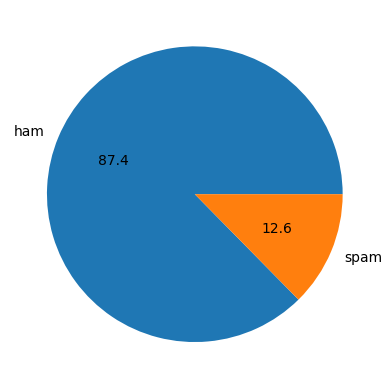

In [17]:
import matplotlib.pyplot as plt
plt.pie(dataframe["key"].value_counts(), labels=['ham','spam'], autopct="%0.1f")
plt.show()

In [18]:
# To analyze the data a bit more, it is important have more parameters. 
# Here we are having character count, word count and sentences count.
import nltk

In [19]:
# New column for character count
dataframe['char_count'] = dataframe['msg'].apply(len)
dataframe.sample(5)

,key,msg,char_count
380,0,I guess that's why you re worried. You must kn...,300
3992,0,Nimbomsons. Yep phone knows that one. Obviousl...,70
2524,1,FREE entry into our å£250 weekly comp just sen...,100
181,0,Lol no. U can trust me.,23
550,0,Imagine you finally get to sink into that bath...,281


In [20]:
# New column for word count
dataframe['word_count'] = dataframe['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
dataframe.sample(5)

,key,msg,char_count,word_count
5230,0,"Nope, I'm still in the market",29,8
2266,1,<Forwarded from 88877>FREE entry into our å£25...,122,26
145,0,Whats the staff name who is taking class for us?,48,11
310,0,Today is ACCEPT DAY..U Accept me as? Brother S...,156,27
3328,0,Sac will score big hundred.he is set batsman:-),47,11


In [21]:
# New column for sentence count
dataframe['sent_count'] = dataframe['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataframe.sample(5)

,key,msg,char_count,word_count,sent_count
2334,0,Do you like Italian food?,25,6,1
4290,0,Call me when u're done...,25,7,1
1453,0,Stupid.its not possible,23,3,1
596,0,Gud mrng dear have a nice day,29,7,1
2035,0,Simply sitting and watching match in office..,45,8,1


In [22]:
# To see how the data shape up 
dataframe.describe()

,key,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# How does parameters behave in ham
dataframe[dataframe['key'] == 0][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# How does parameters behave in spam
dataframe[dataframe['key'] == 1][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sb

<Axes: title={'center': 'CHAR_COUNT COMPARISON (red-spam & blue-ham)'}, xlabel='char_count', ylabel='Count'>

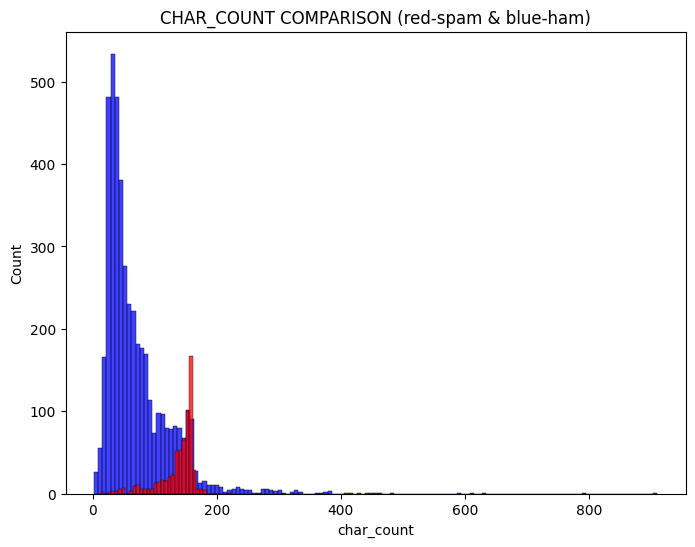

In [26]:
plt.figure(figsize=(8,6))
plt.title("CHAR_COUNT COMPARISON (red-spam & blue-ham)")
sb.histplot(dataframe[dataframe['key'] == 0]['char_count'],color='blue')
sb.histplot(dataframe[dataframe['key'] == 1]['char_count'], color='red')

<Axes: title={'center': 'WORD_COUNT COMPARISON (red-spam & blue-ham)'}, xlabel='word_count', ylabel='Count'>

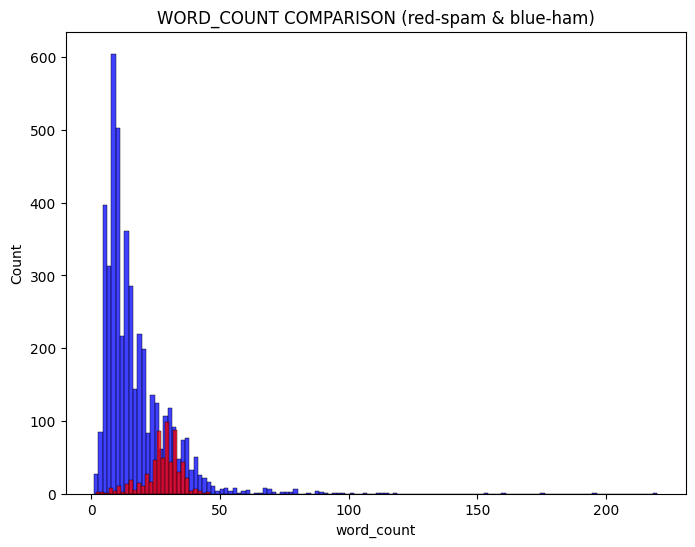

In [27]:
plt.figure(figsize=(8,6))
plt.title("WORD_COUNT COMPARISON (red-spam & blue-ham)")
sb.histplot(dataframe[dataframe['key'] == 0]['word_count'],color='blue')
sb.histplot(dataframe[dataframe['key'] == 1]['word_count'], color='red')

## Data Preprocessing

In [28]:
# This function will preprocess the text message for further analysis
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def txt_preprocess(msg):
    
    # convert all to lowercase
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    
    # remove special characters 
    temp = []
    for i in msg:
        if i.isalnum():
            temp.append(i)
    msg = temp[:]
    temp.clear()
    
    # remove stopwords and punctuations
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i) 
    msg = temp[:]
    temp.clear()
    
    # stemming - keeping only the root words (danc = dance = dancing = dances)
    for i in msg:
        temp.append(ps.stem(i))
    
    return " ".join(temp)
    

In [29]:
# Applying this function on the data
dataframe['processed_msg'] = dataframe['msg'].apply(txt_preprocess)
dataframe.sample(5)

,key,msg,char_count,word_count,sent_count,processed_msg
938,1,Urgent! call 09061749602 from Landline. Your c...,149,28,3,urgent call 09061749602 landlin complimentari ...
1358,0,If i start sending blackberry torch to nigeria...,131,30,2,start send blackberri torch nigeria find buyer...
5456,1,\For the most sparkling shopping breaks from 4...,112,19,1,sparkl shop break 45 per person call 0121 2025...
3277,0,What happened in interview?,27,5,1,happen interview
796,1,"Orange customer, you may now claim your FREE C...",160,35,5,orang custom may claim free camera phone upgra...


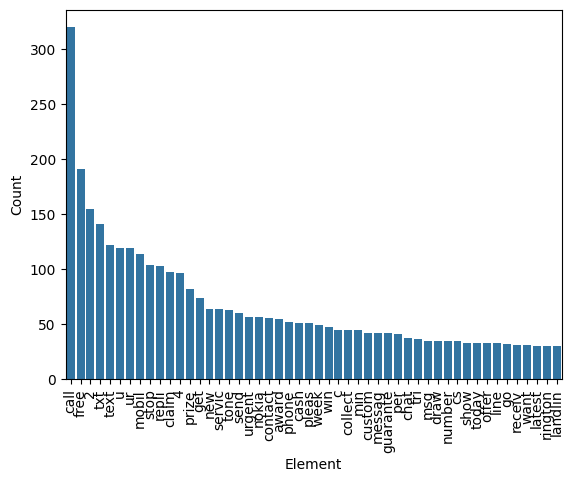

In [30]:
# To find the most used words and finding patterns in SPAM
spam_words = []
for msg in dataframe[dataframe['key']==1]['processed_msg'].tolist():
    for word in msg.split():
        spam_words.append(word)

from collections import Counter
spam_counter = Counter(spam_words)
df = pd.DataFrame(spam_counter.most_common(50), columns=['Element', 'Count'])

sb.barplot(x='Element', y='Count', data=df)
plt.xticks(rotation='vertical')
plt.show()

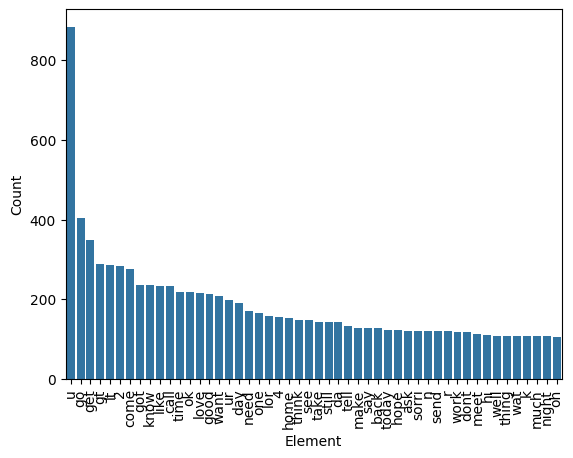

In [31]:
# To find the most used words and finding patterns in HAM
ham_words = []
for msg in dataframe[dataframe['key']==0]['processed_msg'].tolist():
    for word in msg.split():
        ham_words.append(word)

ham_counter = Counter(ham_words)
df = pd.DataFrame(ham_counter.most_common(50), columns=['Element', 'Count'])

sb.barplot(x='Element', y='Count', data=df)
plt.xticks(rotation='vertical')
plt.show()

## Building Model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [34]:
X = tfidf.fit_transform(dataframe['processed_msg']).toarray()
X.shape

(5169, 3000)

In [35]:
y = dataframe['key'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
# Gaussian NB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [45]:
# Multinomial NB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [47]:
# Bernoulli NB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [58]:
# Though Multinomial Naive Bayes model looks good, it is salways better to experiment with multiple models.
# Below are the results after experimenting with various other models.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [60]:
# It is clear that Naive Bayes and Random forests are the reasonably good models.
# As precision matter more in this case, we go with Multinomial Naive Bayes model

## Serialization 

In [61]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('mnb_model.pkl', 'wb'))